In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b0892e6d6a5ef8838277813d2bd34fb2


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | chokurdakh
Processing Record 2 of Set 12 | bull savanna
Processing Record 3 of Set 12 | pasighat
Processing Record 4 of Set 12 | bambous virieux
Processing Record 5 of Set 12 | chuy
Processing Record 6 of Set 12 | flin flon
Processing Record 7 of Set 12 | meyungs
City not found. Skipping...
Processing Record 8 of Set 12 | carnarvon
Processing Record 9 of Set 12 | saint-joseph
Processing Record 10 of Set 12 | kutum
Processing Record 11 of Set 12 | new norfolk
Processing Record 12 of Set 12 | kapaa
Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | torbay
Processing Record 15 of Set 12 | bilibino
Processing Record 16 of Set 12 | saint-philippe
Processing Record 17 of Set 12 | severo-kurilsk
Processing Record 18 of Set 12 | bluff
Processing Record 19 of Set 12 | viseu
Processing Record 20 of Set 12 | fortuna
Processing Record 21 of Set 12 | talnakh
Processing Record 22 of Set 12 | walvis bay
Processing Record 23 of Set 12 | lagoa
Process

Processing Record 39 of Set 15 | lephepe
City not found. Skipping...
Processing Record 40 of Set 15 | fort william
Processing Record 41 of Set 15 | marcona
City not found. Skipping...
Processing Record 42 of Set 15 | maumere
Processing Record 43 of Set 15 | mar del plata
Processing Record 44 of Set 15 | ende
Processing Record 45 of Set 15 | chagda
City not found. Skipping...
Processing Record 46 of Set 15 | tuktoyaktuk
Processing Record 47 of Set 15 | pisco
Processing Record 48 of Set 15 | sitka
Processing Record 49 of Set 15 | halalo
City not found. Skipping...
Processing Record 50 of Set 15 | castro
Processing Record 1 of Set 16 | emba
Processing Record 2 of Set 16 | kenai
Processing Record 3 of Set 16 | broken hill
Processing Record 4 of Set 16 | ampanihy
Processing Record 5 of Set 16 | kurumkan
Processing Record 6 of Set 16 | chuchkovo
Processing Record 7 of Set 16 | noumea
Processing Record 8 of Set 16 | northam
Processing Record 9 of Set 16 | illoqqortoormiut
City not found. Skip

Processing Record 22 of Set 19 | south lake tahoe
Processing Record 23 of Set 19 | paragominas
Processing Record 24 of Set 19 | nacala
Processing Record 25 of Set 19 | moscow
Processing Record 26 of Set 19 | alugan
Processing Record 27 of Set 19 | provideniya
Processing Record 28 of Set 19 | kirakira
Processing Record 29 of Set 19 | barcelos
Processing Record 30 of Set 19 | sosua
Processing Record 31 of Set 19 | grong
Processing Record 32 of Set 19 | nome
Processing Record 33 of Set 19 | quang ngai
Processing Record 34 of Set 19 | gharghoda
Processing Record 35 of Set 19 | kromy
Processing Record 36 of Set 19 | carmen
Processing Record 37 of Set 19 | nevsehir
Processing Record 38 of Set 19 | havoysund
Processing Record 39 of Set 19 | naze
Processing Record 40 of Set 19 | patawag
Processing Record 41 of Set 19 | marsh harbour
Processing Record 42 of Set 19 | batagay-alyta
Processing Record 43 of Set 19 | kitimat
Processing Record 44 of Set 19 | mponela
Processing Record 45 of Set 19 | s

Processing Record 7 of Set 23 | roros
Processing Record 8 of Set 23 | mentok
City not found. Skipping...
Processing Record 9 of Set 23 | ngukurr
City not found. Skipping...
Processing Record 10 of Set 23 | delray beach
Processing Record 11 of Set 23 | amderma
City not found. Skipping...
Processing Record 12 of Set 23 | kedougou
Processing Record 13 of Set 23 | calatayud
Processing Record 14 of Set 23 | erzin
Processing Record 15 of Set 23 | ahipara
Processing Record 16 of Set 23 | pacific grove
Processing Record 17 of Set 23 | lovozero
Processing Record 18 of Set 23 | saint-augustin
Processing Record 19 of Set 23 | chenzhou
Processing Record 20 of Set 23 | marsa matruh
Processing Record 21 of Set 23 | samarai
Processing Record 22 of Set 23 | milas
Processing Record 23 of Set 23 | qinzhou
Processing Record 24 of Set 23 | oktyabrskiy
Processing Record 25 of Set 23 | sentyabrskiy
City not found. Skipping...
Processing Record 26 of Set 23 | whangamata
Processing Record 27 of Set 23 | yilan

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,-23.75,85,71,7.34,RU,2021-02-07 17:37:36
1,Bull Savanna,17.8868,-77.5902,80.51,65,5,19.13,JM,2021-02-07 17:37:56
2,Pasighat,28.0667,95.3333,60.15,45,4,3.18,IN,2021-02-07 17:42:45
3,Bambous Virieux,-20.3428,57.7575,80.60,74,20,10.36,MU,2021-02-07 17:38:00
4,Chuy,-33.6971,-53.4616,76.33,60,1,8.97,UY,2021-02-07 17:37:16
5,Flin Flon,54.7682,-101.8650,-34.60,61,1,12.66,CA,2021-02-07 17:42:45
6,Carnarvon,-24.8667,113.6333,78.80,100,40,12.66,AU,2021-02-07 17:36:21
7,Saint-Joseph,-21.3667,55.6167,80.60,78,32,5.75,RE,2021-02-07 17:37:44
8,Kutum,14.2000,24.6667,60.03,29,9,8.30,SD,2021-02-07 17:42:46
9,New Norfolk,-42.7826,147.0587,53.60,66,90,6.91,AU,2021-02-07 17:37:25


In [12]:
# Reorder the columns 
new_column_city_data=['City','Country','Date','Lat','Lng','Max Temp', 'Humidity', 'Cloudiness','Wind Speed']

In [13]:
city_data_df = city_data_df[new_column_city_data]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-02-07 17:37:36,70.6333,147.9167,-23.75,85,71,7.34
1,Bull Savanna,JM,2021-02-07 17:37:56,17.8868,-77.5902,80.51,65,5,19.13
2,Pasighat,IN,2021-02-07 17:42:45,28.0667,95.3333,60.15,45,4,3.18
3,Bambous Virieux,MU,2021-02-07 17:38:00,-20.3428,57.7575,80.60,74,20,10.36
4,Chuy,UY,2021-02-07 17:37:16,-33.6971,-53.4616,76.33,60,1,8.97
5,Flin Flon,CA,2021-02-07 17:42:45,54.7682,-101.8650,-34.60,61,1,12.66
6,Carnarvon,AU,2021-02-07 17:36:21,-24.8667,113.6333,78.80,100,40,12.66
7,Saint-Joseph,RE,2021-02-07 17:37:44,-21.3667,55.6167,80.60,78,32,5.75
8,Kutum,SD,2021-02-07 17:42:46,14.2000,24.6667,60.03,29,9,8.30
9,New Norfolk,AU,2021-02-07 17:37:25,-42.7826,147.0587,53.60,66,90,6.91


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

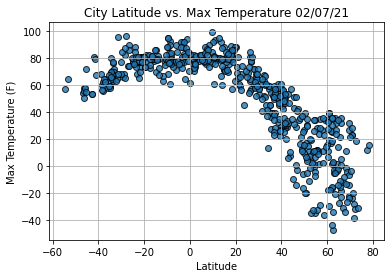

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

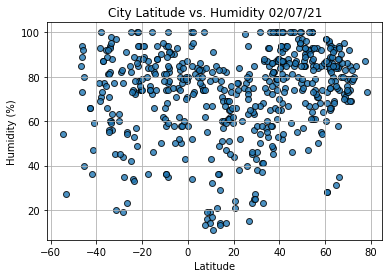

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

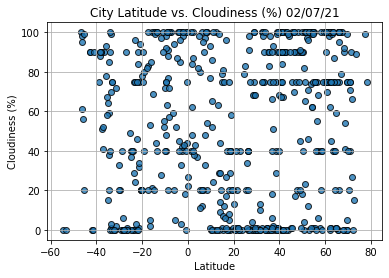

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

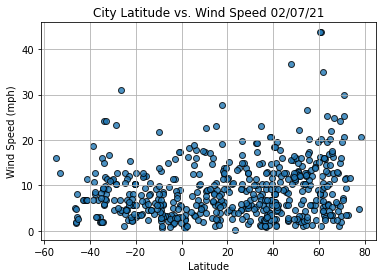

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                     Bilibino
Country                        RU
Date          2021-02-07 17:37:47
Lat                       68.0546
Lng                       166.437
Max Temp                    -1.23
Humidity                       72
Cloudiness                      0
Wind Speed                   6.02
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
540     True
541    False
542     True
543     True
544     True
Name: Lat, Length: 545, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-02-07 17:37:36,70.6333,147.9167,-23.75,85,71,7.34
1,Bull Savanna,JM,2021-02-07 17:37:56,17.8868,-77.5902,80.51,65,5,19.13
2,Pasighat,IN,2021-02-07 17:42:45,28.0667,95.3333,60.15,45,4,3.18
5,Flin Flon,CA,2021-02-07 17:42:45,54.7682,-101.8650,-34.60,61,1,12.66
8,Kutum,SD,2021-02-07 17:42:46,14.2000,24.6667,60.03,29,9,8.30


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

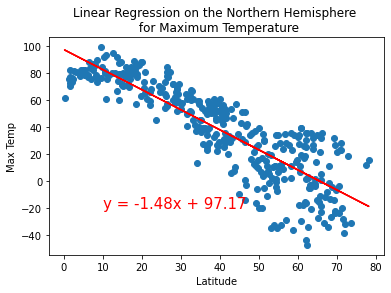

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,-20))

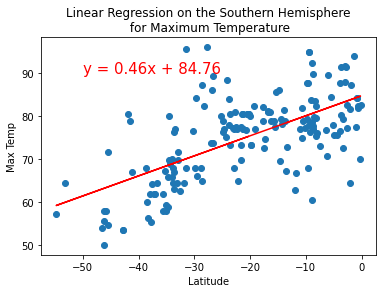

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

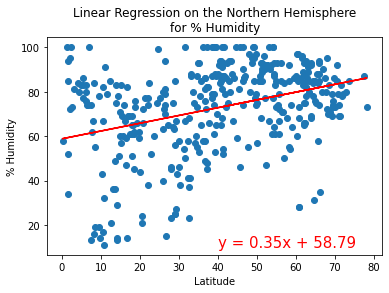

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

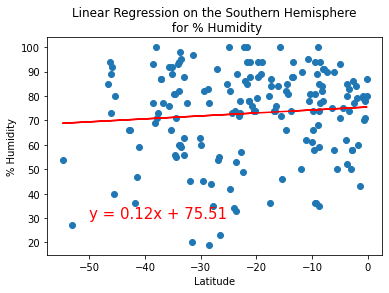

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,30))

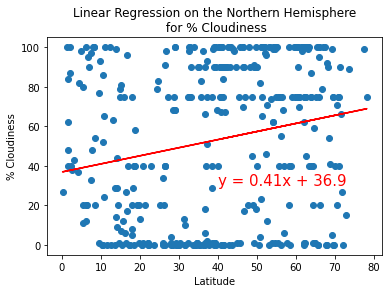

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness', '% Cloudiness',(40,30))

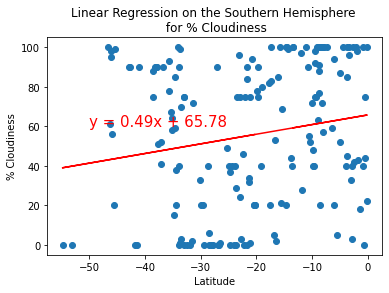

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

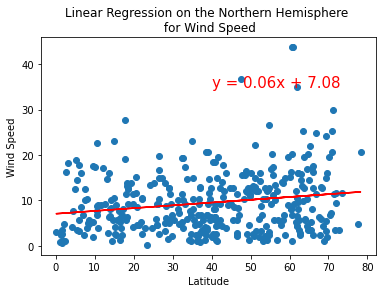

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

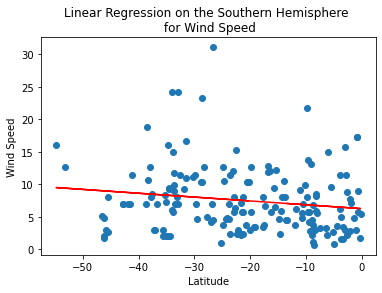

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))